<a href="https://colab.research.google.com/github/Jkhadgi/Google_Earth_Engine/blob/main/LIBS_image_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.filters.rank import entropy
from skimage.morphology import disk, ball
from skimage.color import rgb2gray
from skimage.measure import shannon_entropy
import numpy as np

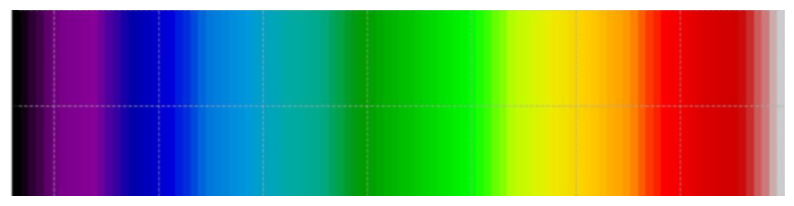

In [58]:
image = imread("/content/LIBSIMAGE.JPG")  #this image is cropped from https://doi.org/10.1016/j.sab.2025.107315 for learning purpose
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(image)

In [52]:
#Global entropy
if image.ndim == 3:
    image_gray = rgb2gray(image)
else:
    image_gray = image

global_entropy = shannon_entropy(image_gray)

print("Global entropy:", global_entropy)

Global entropy: 10.780480820429085


/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


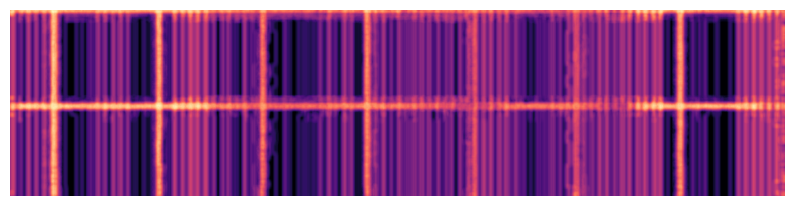

In [59]:
# local entropy for the grayscale image
image_gray = rgb2gray(image)
entropy_image = entropy(image_gray, disk(5))
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(entropy_image, cmap = 'magma')

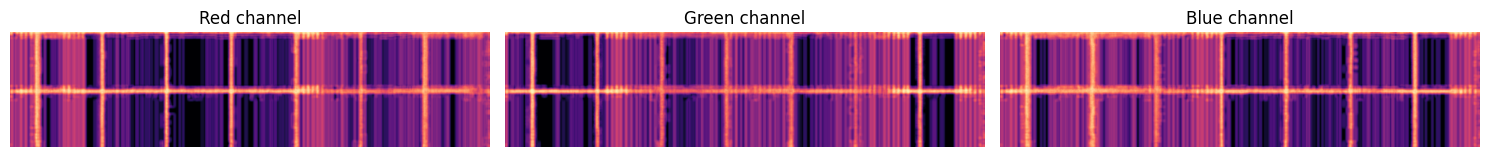

In [55]:
#local entropy for each color channel

image_r = image[:, :, 0]
image_g = image[:, :, 1]
image_b = image[:, :, 2]

entropy_red = entropy(image_r, disk(5))
entropy_green = entropy(image_g, disk(5))
entropy_blue = entropy(image_b, disk(5))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(entropy_red, cmap='magma')
plt.title('Red channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(entropy_green, cmap='magma')
plt.title('Green channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(entropy_blue, cmap='magma')
plt.title('Blue channel')
plt.axis('off')

plt.tight_layout()
plt.show()

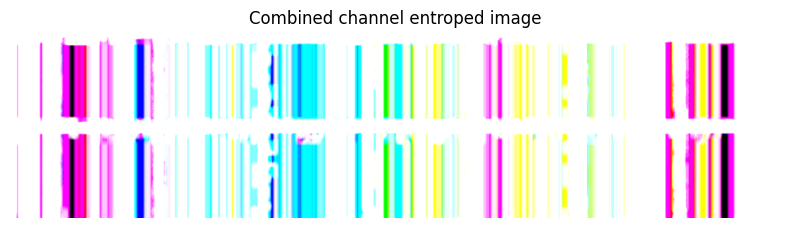

In [56]:
# Stack each channel imgs
combined_entropy_image = np.dstack((entropy_red, entropy_green, entropy_blue))
#print(combined_entropy_image.shape)
plt.figure(figsize=(10, 10))
plt.imshow(combined_entropy_image)
plt.title('Combined channel entroped image ')
plt.axis('off')
plt.show()